# Introduction

This project focuses on analyzing and modeling the Campus Recruitment Dataset, which captures detailed records of placement outcomes from campus drives. The dataset includes academic performance metrics (such as percentage scores), demographic characteristics (like gender and prior work experience), institutional factors, and a binary target variable indicating placement status. The primary goal is to build predictive models that can accurately classify whether a student will be placed based on their profile.

The assignment is divided into three main parts. First, we perform data preprocessing and exploratory data analysis (EDA) to clean the dataset, handle missing values and outliers, and uncover significant patterns and feature relationships. This step concludes with normalization and appropriate encoding of categorical features to prepare the data for modeling.

In the second part, we develop and evaluate a set of classification models using an 80/20 train-test split. The required models include Logistic Regression, Naive Bayes, and Linear Discriminant Analysis (LDA), SVM and KNN. The models are assessed using a range of performance metrics such as accuracy, precision, recall, F1-score, and ROC-AUC, along with visualizations including confusion matrices, ROC curves, and precision-recall curves. These evaluations help interpret model effectiveness and identify the most promising approach.

The final part of the project involves enhancing the best-performing model through advanced techniques such as feature engineering, regularization (e.g., L1 and L2 penalties), and cross-validation. The objective is to improve generalization performance while providing clear justifications for all methodological choices.

### Importing libraries

In [55]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve,auc
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc


### Loading the dataset

In [56]:
df = pd.read_csv("./Placement_Data_Full_Class.csv")

In [57]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [58]:
df.drop(columns=['sl_no'], inplace=True)

In [59]:
df.columns

Index(['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p',
       'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p', 'status',
       'salary'],
      dtype='object')

In [60]:
df.shape

(215, 14)

### Cheking for null values

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
 13  salary          148 non-null    float64
dtypes: float64(6), object(8)
memory usage: 23.6+ KB


### The null values in the Salary column correspond to individuals who were not placed

In [62]:
empty_salaries = df['salary'].isna().sum()/(len(df))*100
print(f"Salary column has {empty_salaries}% null values.")

Salary column has 31.16279069767442% null values.


In [63]:
df.describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


### Take a look at categorical data

In [64]:
df.select_dtypes(include=['object']).head()

,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
0,M,Others,Others,Commerce,Sci&Tech,No,Mkt&HR,Placed
1,M,Central,Others,Science,Sci&Tech,Yes,Mkt&Fin,Placed
2,M,Central,Central,Arts,Comm&Mgmt,No,Mkt&Fin,Placed
3,M,Central,Central,Science,Sci&Tech,No,Mkt&HR,Not Placed
4,M,Central,Central,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed


In [65]:
object_columns = df.select_dtypes(include=['object']).columns

for col in object_columns:
    print('-' * 40 + col + '-' * 40 , end='-')
    display(df[col].value_counts())

----------------------------------------gender-----------------------------------------

gender
M    139
F     76
Name: count, dtype: int64

----------------------------------------ssc_b-----------------------------------------

ssc_b
Central    116
Others      99
Name: count, dtype: int64

----------------------------------------hsc_b-----------------------------------------

hsc_b
Others     131
Central     84
Name: count, dtype: int64

----------------------------------------hsc_s-----------------------------------------

hsc_s
Commerce    113
Science      91
Arts         11
Name: count, dtype: int64

----------------------------------------degree_t-----------------------------------------

degree_t
Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: count, dtype: int64

----------------------------------------workex-----------------------------------------

workex
No     141
Yes     74
Name: count, dtype: int64

----------------------------------------specialisation-----------------------------------------

specialisation
Mkt&Fin    120
Mkt&HR      95
Name: count, dtype: int64

----------------------------------------status-----------------------------------------

status
Placed        148
Not Placed     67
Name: count, dtype: int64

### Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) is a critical step in the data science workflow, as it enables a deeper understanding of the dataset before any modeling takes place. In this phase, we aim to uncover patterns, identify potential anomalies, assess data distributions, and explore relationships between features and the target variable. This process not only informs our decisions regarding feature selection and preprocessing but also helps us develop initial hypotheses about which factors might influence placement outcomes. The EDA section involves both visual and statistical techniques to examine the structure of the data and to prepare it for the modeling phase that follows.

----------------------------------------------------------------------------------------------------------------------
This visualization was created to examine the gender distribution within the dataset. A count plot was used with custom colors to clearly distinguish between male and female students. The plot shows how many students of each gender are represented in the dataset, which provides context for further analysis—especially when exploring gender-related trends in placement outcomes.

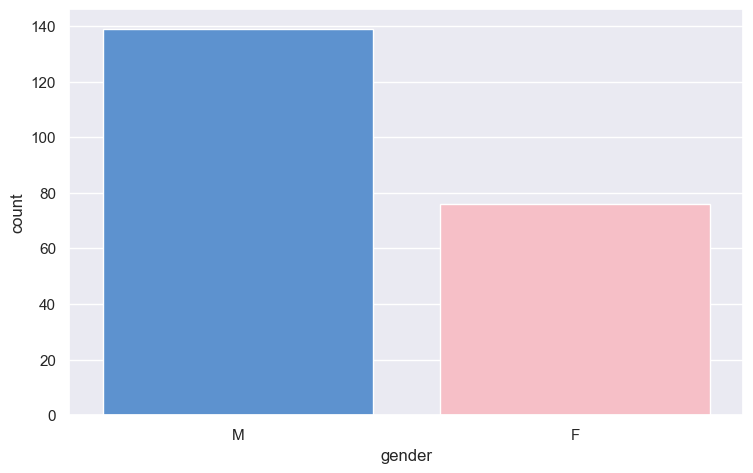

In [66]:
custom_colors = {"M": "#4A90E2", "F": "#FFB6C1"}
sns.countplot(x="gender", data=df, palette=custom_colors)
plt.show()

This plot compares placement outcomes across genders, showing how many male and female students were placed or not placed in the dataset.

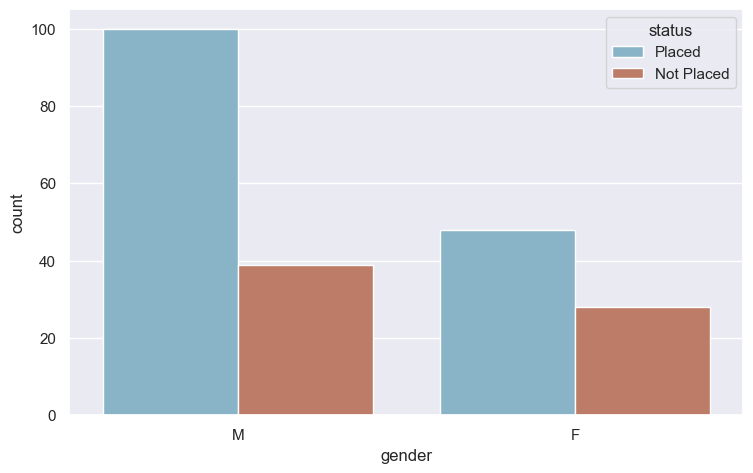

In [67]:
custom_colors = {"Placed": "#7FB8D1", "Not Placed": "#CA755A"}
sns.countplot(x="gender", hue="status", data=df, palette=custom_colors)
plt.show()

This count plot illustrates the distribution of students based on their secondary school board, highlighting how many attended a central board versus other boards.

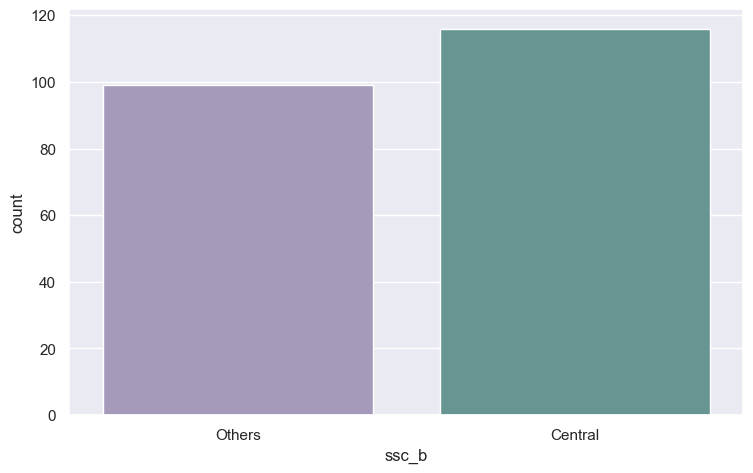

In [68]:
custom_colors = {'Central' : "#5F9D97", "Others" : "#A395BE" }
sns.countplot(x='ssc_b', data=df, palette=custom_colors)
plt.show()

This plot shows the relationship between secondary school board type and placement status, allowing us to compare placement rates among students from central and other boards.

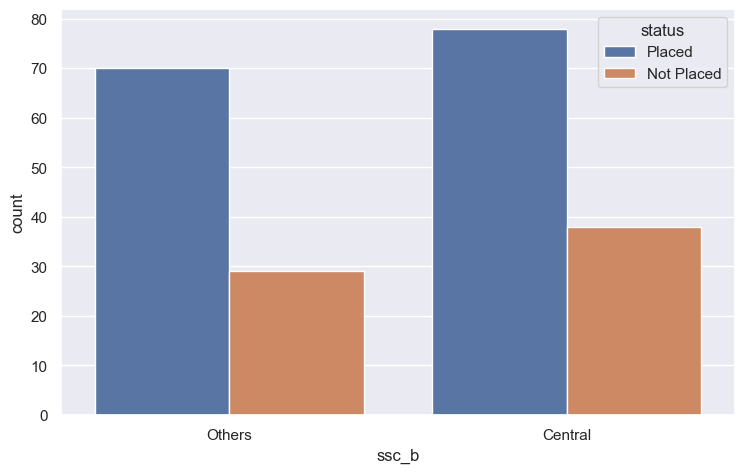

In [69]:
sns.set(rc={'figure.figsize':(8.7,5.27)})

sns.countplot(x="ssc_b", hue="status", data=df)
plt.show()

This bar plot illustrates the average Secondary Education percentage (ssc_p) for students based on their placement status, using a custom color palette to differentiate between placed and not placed students.

<Axes: xlabel='status', ylabel='ssc_p'>

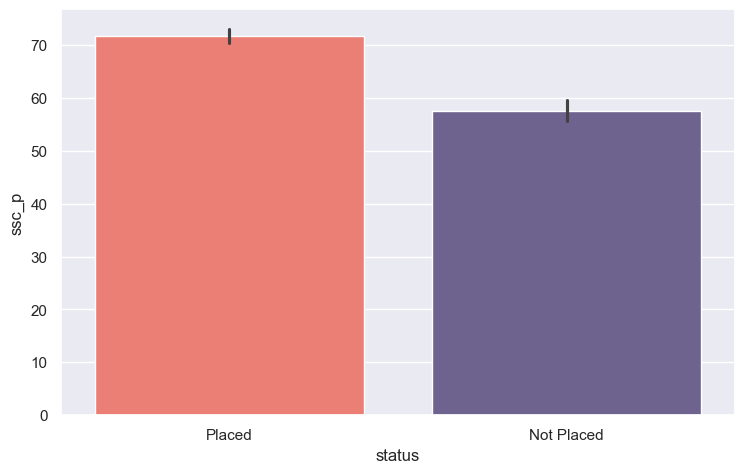

In [70]:
custom_palette = ["#FF6F61", "#6B5B95"]
sns.barplot(x="status", y="ssc_p", data=df, palette=custom_palette)

This bar plot shows the relationship between the type of secondary school board (ssc_b) and the Secondary Education percentage (ssc_p), providing insight into how the board type correlates with academic performance.

<Axes: xlabel='ssc_b', ylabel='ssc_p'>

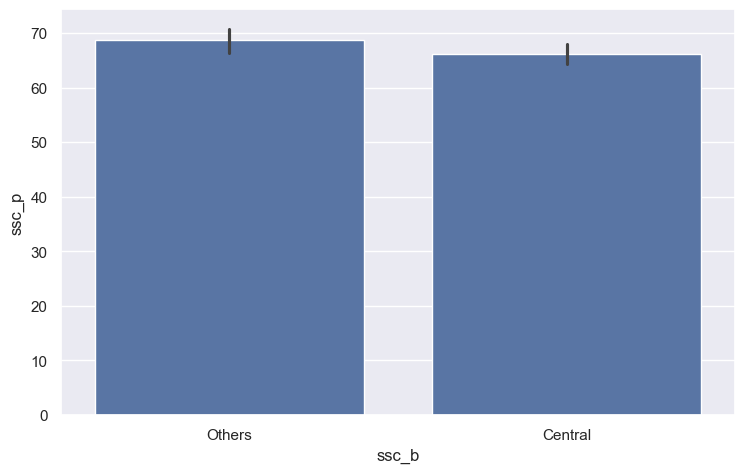

In [71]:
sns.barplot(x="ssc_b", y="ssc_p", data=df)

This count plot displays the distribution of students based on their higher secondary school board type (hsc_b), showing how many students attended each board type in the dataset.

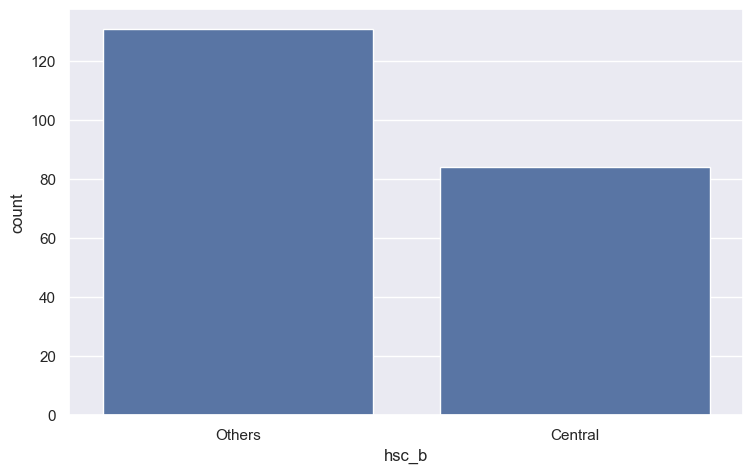

In [72]:
sns.countplot(x="hsc_b", data = df)
plt.show()

This count plot illustrates the placement outcomes across different higher secondary school board types (hsc_b), allowing a comparison of placement rates for students from each board type.

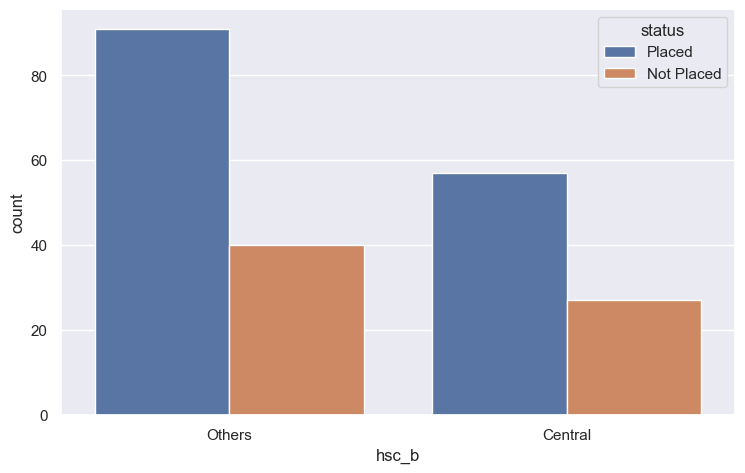

In [73]:
sns.set(rc={'figure.figsize':(8.7,5.27)})

sns.countplot(x="hsc_b", hue="status", data=df)
plt.show()

This bar plot shows the average Higher Secondary Education percentage (hsc_p) for students based on their placement status, providing insight into how academic performance correlates with placement outcomes.

<Axes: xlabel='status', ylabel='hsc_p'>

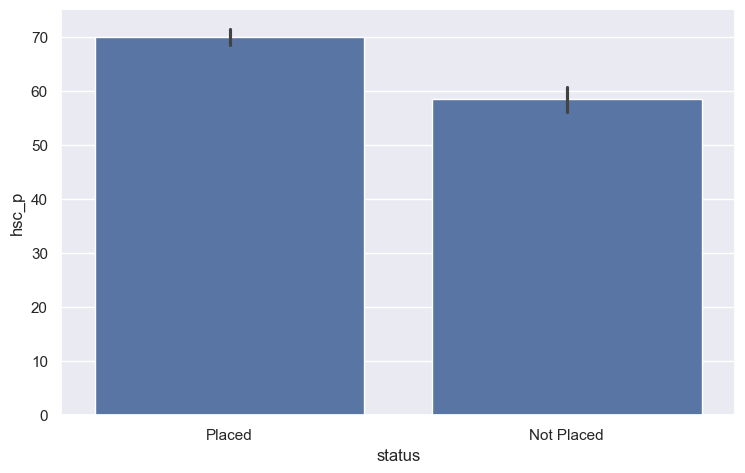

In [74]:
sns.barplot(x="status", y="hsc_p", data=df)

This bar plot visualizes the relationship between the higher secondary school board type (hsc_b) and the Higher Secondary Education percentage (hsc_p), highlighting the average academic performance for each board type.

<Axes: xlabel='hsc_b', ylabel='hsc_p'>

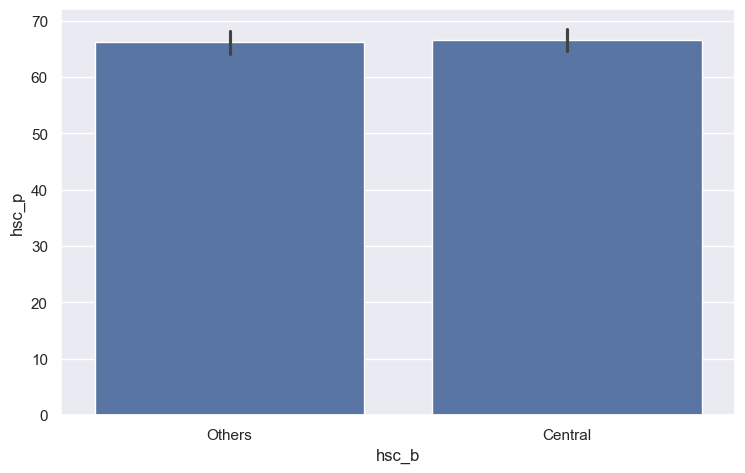

In [75]:
sns.barplot(x="hsc_b", y="hsc_p", data=df)

This count plot shows the distribution of students based on their higher secondary education specialisation (hsc_s), illustrating how many students pursued each specialisation in the dataset.

<Axes: xlabel='hsc_s', ylabel='count'>

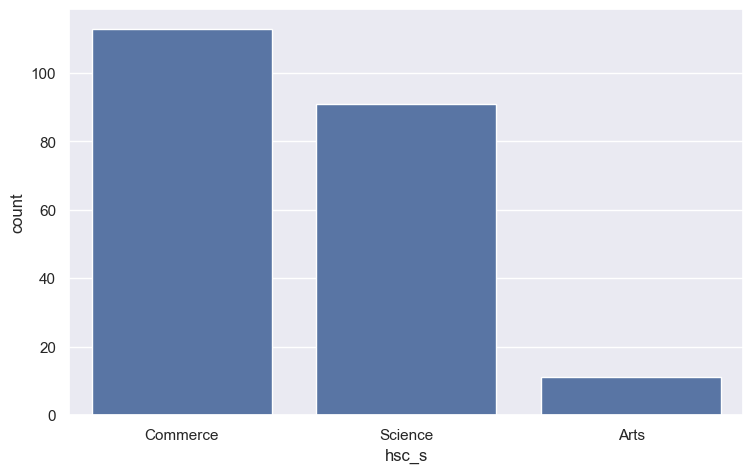

In [76]:
sns.countplot(x="hsc_s", data=df)

This bar plot illustrates the average Higher Secondary Education percentage (hsc_p) for students based on their higher secondary education specialisation (hsc_s), providing insight into how performance varies across different specialisations.

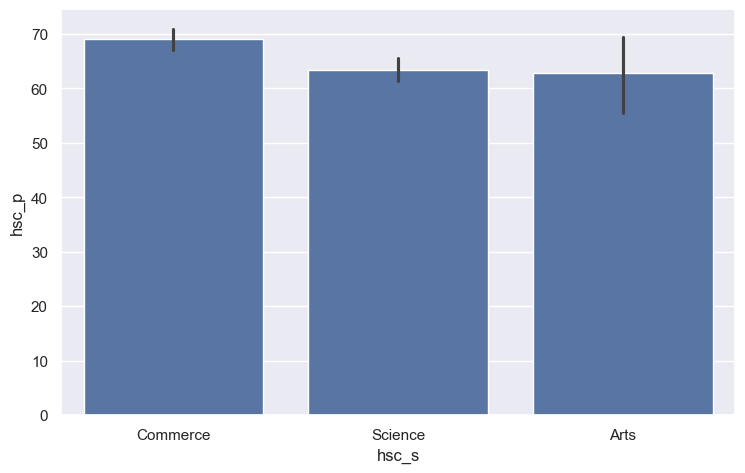

In [77]:
ax = sns.barplot(x="hsc_s", y="hsc_p", data=df)

This count plot compares placement outcomes across different higher secondary education specialisations (hsc_s), showing how many students from each specialisation were placed or not placed.

<Axes: xlabel='hsc_s', ylabel='count'>

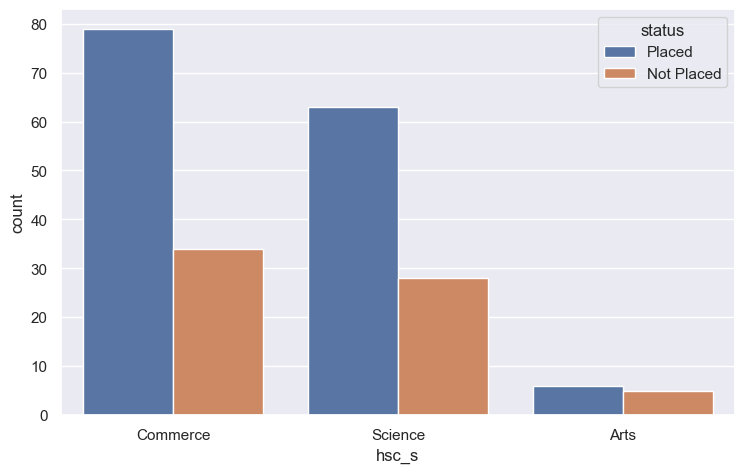

In [78]:
sns.countplot(x="hsc_s", hue="status", data=df)

This count plot shows the distribution of students based on their undergraduate degree type (degree_t), illustrating how many students pursued each degree type in the dataset.

<Axes: xlabel='degree_t', ylabel='count'>

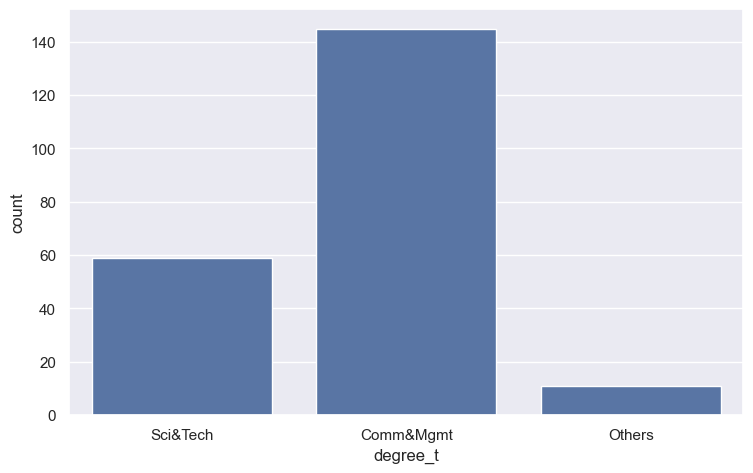

In [79]:
sns.countplot(x="degree_t", data=df)

This bar plot shows the average undergraduate degree percentage (degree_p) for students based on their degree type (degree_t), providing insights into how academic performance varies across different degree types.

<Axes: xlabel='degree_t', ylabel='degree_p'>

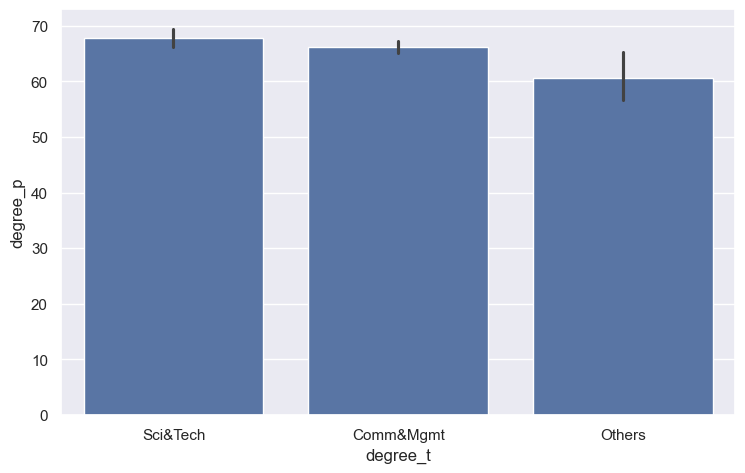

In [80]:
sns.barplot(x="degree_t", y="degree_p", data=df)

This count plot compares placement outcomes across different undergraduate degree types (degree_t), showing how many students from each degree type were placed or not placed.

<Axes: xlabel='degree_t', ylabel='count'>

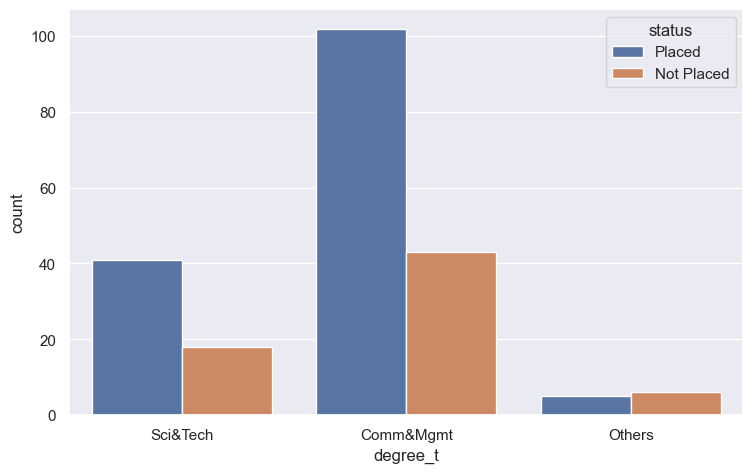

In [81]:
sns.countplot(x="degree_t", hue="status", data=df)

This bar plot shows the relationship between work experience (workex) and placement status (status), illustrating the average placement rate for students with and without work experience.

<Axes: xlabel='workex', ylabel='status'>

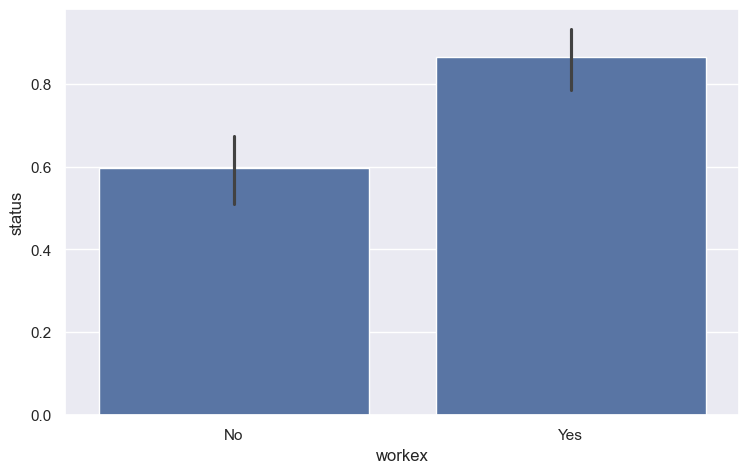

In [82]:
df['status'] = df['status'].map( {'Placed':1, 'Not Placed':0})

sns.barplot(x="workex", y="status", data=df)

This bar plot illustrates the average E-test percentage (etest_p) for students based on their placement status (status), highlighting how E-test performance correlates with placement outcomes.

<Axes: xlabel='status', ylabel='etest_p'>

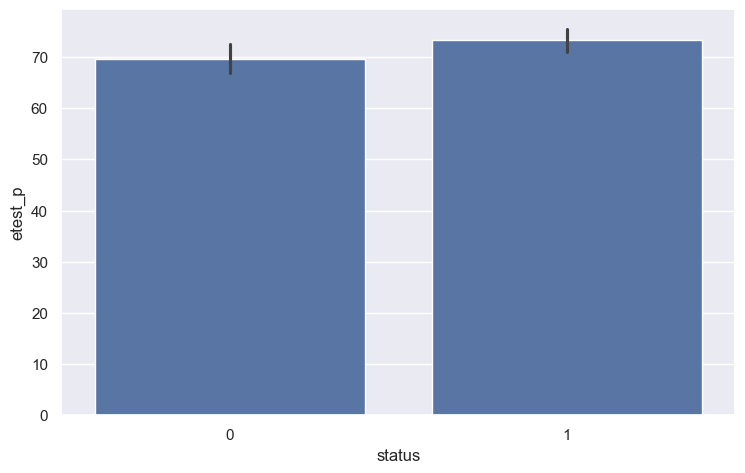

In [83]:
sns.barplot(x="status", y="etest_p", data=df)

This count plot compares placement outcomes across different specialisations (specialisation), showing how many students from each specialisation were placed or not placed.

<Axes: xlabel='specialisation', ylabel='count'>

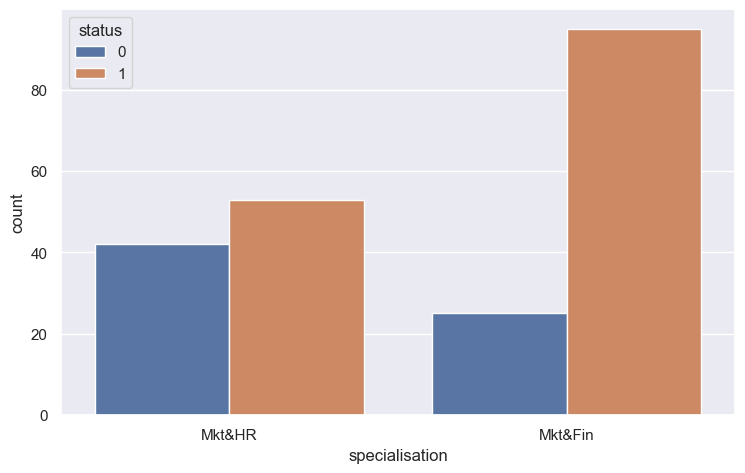

In [84]:
sns.countplot(x="specialisation", hue="status", data=df)

This bar plot illustrates the average MBA percentage (mba_p) for students based on their placement status (status), with a title emphasizing the relationship between placement outcomes and MBA performance.

Text(0.5, 1.0, 'Salary vs MBA Percentage')

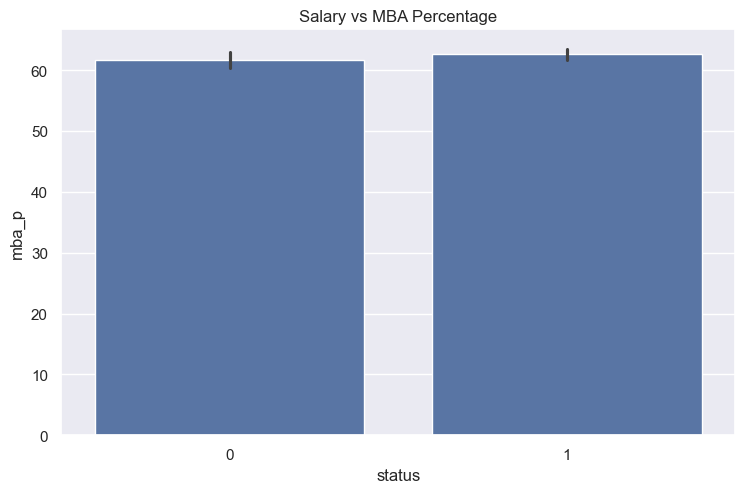

In [85]:
sns.barplot(x="status", y="mba_p", data=df)
plt.title("Salary vs MBA Percentage")

This distribution plot visualizes the salary distribution of students, using a smooth curve to show how salaries are spread across the dataset, with the number of bins set to 50 for a finer granularity.

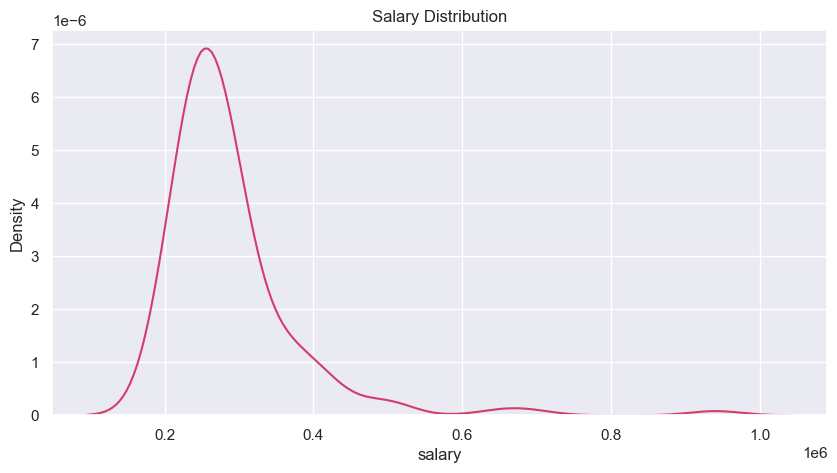

In [86]:
plt.figure(figsize=(10,5))
sns.distplot(df['salary'], bins=50, hist=False, color='#D43B6F')
plt.title("Salary Distribution")
plt.show()

This bar plot shows the average salary for students based on their gender, providing insights into any potential gender differences in salary within the dataset.

Text(0.5, 1.0, 'Salary vs gender')

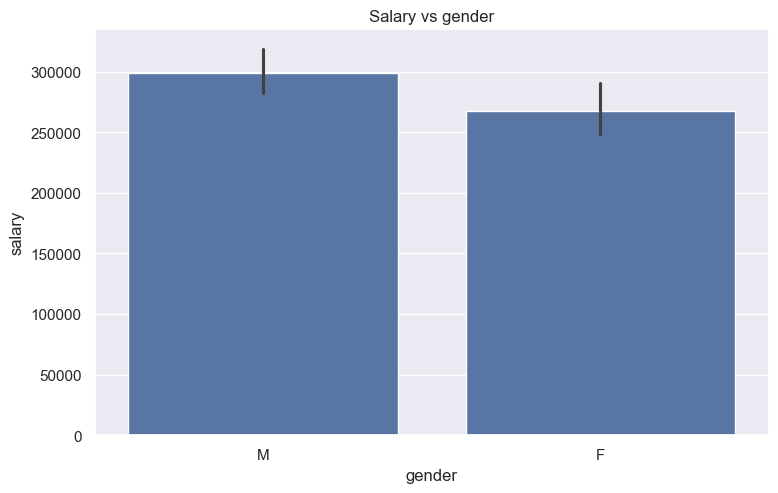

In [87]:
sns.barplot(x="gender", y="salary", data=df)
plt.title("Salary vs gender")

This violin plot illustrates the distribution of salaries for students based on gender, with the data further split by specialisation. It provides a clear view of the salary distribution for each gender within different specialisations.

Text(0.5, 1.0, 'Salary vs Gender based on specialisation')

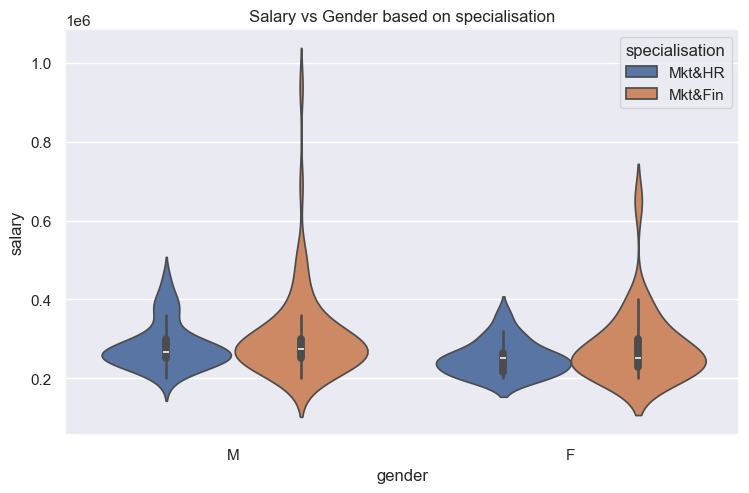

In [88]:
sns.violinplot(x=df["gender"], y=df["salary"], hue=df["specialisation"])
plt.title("Salary vs Gender based on specialisation")

This violin plot shows the distribution of salaries based on gender, with the data further split by work experience (workex). It offers a detailed view of how salaries differ between genders for students with and without work experience.

Text(0.5, 1.0, 'Gender vs Salary based on work experience')

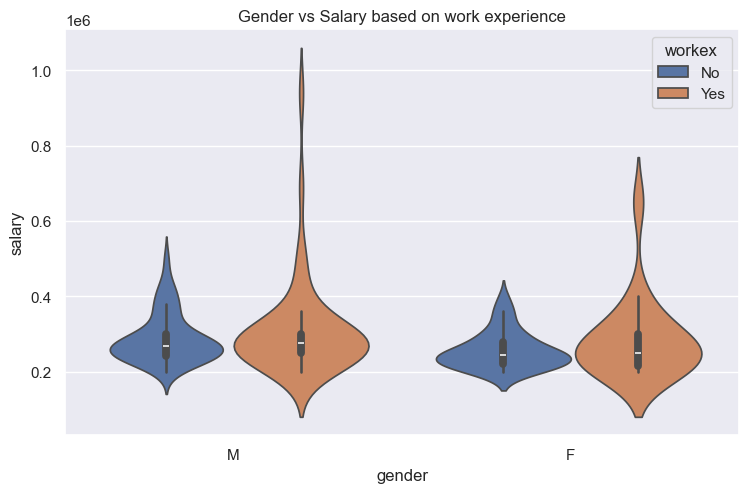

In [89]:
sns.violinplot(x=df["gender"], y=df["salary"], hue=df["workex"])
plt.title("Gender vs Salary based on work experience")

This violin plot displays the distribution of salaries for students based on gender, with the data further split by their board in 10th grade (ssc_b). It provides insights into how salaries vary between genders across different educational boards.

Text(0.5, 1.0, 'Salary vs Gender based on Board in 10th grade')

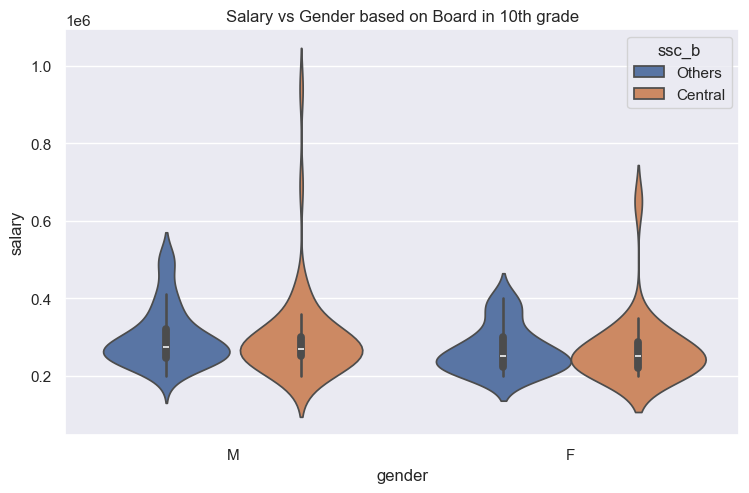

In [90]:
sns.violinplot(x=df["gender"], y=df["salary"], hue=df["ssc_b"])
plt.title("Salary vs Gender based on Board in 10th grade")

This violin plot illustrates the distribution of salaries based on gender, with the data further categorized by the board in 12th grade (hsc_b). It reveals how salaries differ between genders across various educational boards in the 12th grade.

Text(0.5, 1.0, 'Salary vs Gender based on Board in 12th grade')

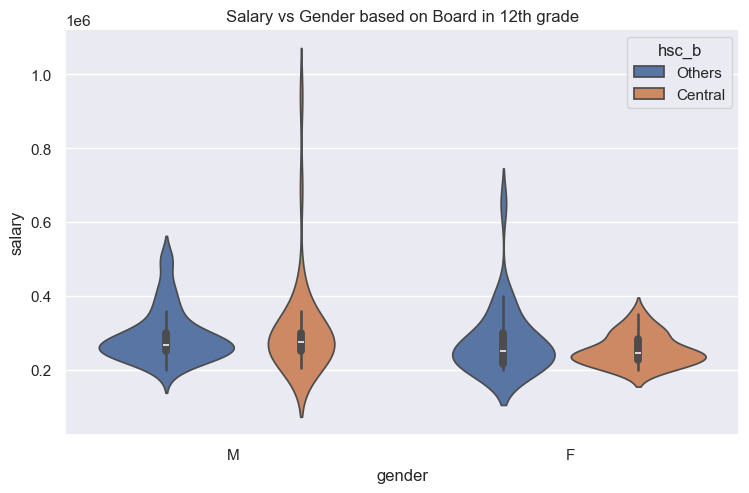

In [91]:
sns.violinplot(x=df["gender"], y=df["salary"], hue=df["hsc_b"])
plt.title("Salary vs Gender based on Board in 12th grade")

This violin plot shows the distribution of salaries for students based on gender, with the data further split by the type of degree (degree_t). It highlights how salaries vary between genders for students pursuing different types of degrees.

Text(0.5, 1.0, 'Salary vs Gender based on Degree Type')

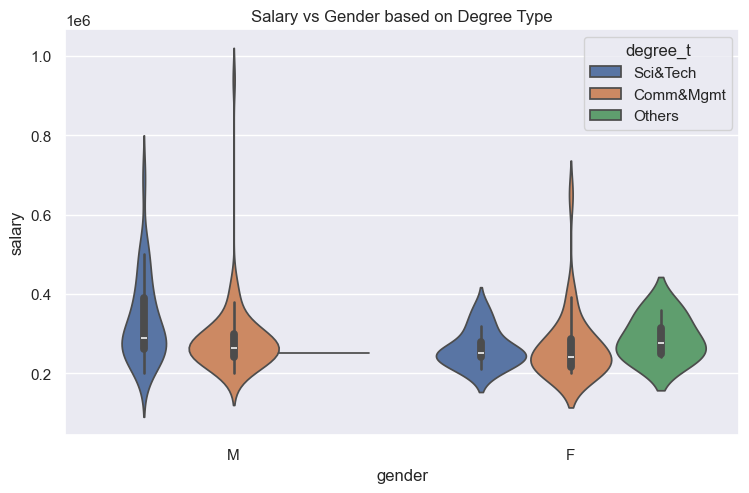

In [92]:
sns.violinplot(x=df["gender"], y=df["salary"], hue=df["degree_t"])
plt.title("Salary vs Gender based on Degree Type")

## Data Cleaning

In the data cleaning phase, we performed several crucial steps to ensure the dataset's quality and readiness for analysis. First, we handled **feature conversion**, where categorical variables were mapped to numerical values to facilitate modeling. We also dealt with **outliers** by identifying and managing extreme values that could skew the results. ALso, we checked for **missing values** before to ensure that no important data was left incomplete.


We dropped the columns ssc_b, hsc_b, and salary as they were not relevant for the analysis.

In [93]:
df.drop(['ssc_b','hsc_b', 'salary'], axis=1, inplace=True)

We applied mapping techniques to convert categorical variables into numerical format: gender (Male = 0, Female = 1), workex (No = 0, Yes = 1), and specialisation (Mkt&HR = 0, Mkt&Fin = 1).

In [94]:
df["gender"] = df.gender.map({"M":0,"F":1})
df["workex"] = df.workex.map({"No":0, "Yes":1})
df["specialisation"] = df.specialisation.map({"Mkt&HR":0, "Mkt&Fin":1})

We used one-hot encoding to convert the categorical columns hsc_s and degree_t into numerical format by creating new binary columns for each unique category within these columns.

We dropped the original categorical columns degree_t and hsc_s to avoid redundancy in the dataset.

In [95]:
df.drop(['degree_t','hsc_s'], axis=1, inplace=True)

In [96]:
df.head()

,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,status
0,0,67.00,91.00,58.00,0,55.0,0,58.80,1
1,0,79.33,78.33,77.48,1,86.5,1,66.28,1
2,0,65.00,68.00,64.00,0,75.0,1,57.80,1
3,0,56.00,52.00,52.00,0,66.0,0,59.43,0
4,0,85.80,73.60,73.30,0,96.8,1,55.50,1


We computed the correlation matrix to understand the relationships between the numerical features in the dataset. The heatmap visually represents these correlations, helping us identify potential multicollinearity or strong correlations between features.

<Axes: >

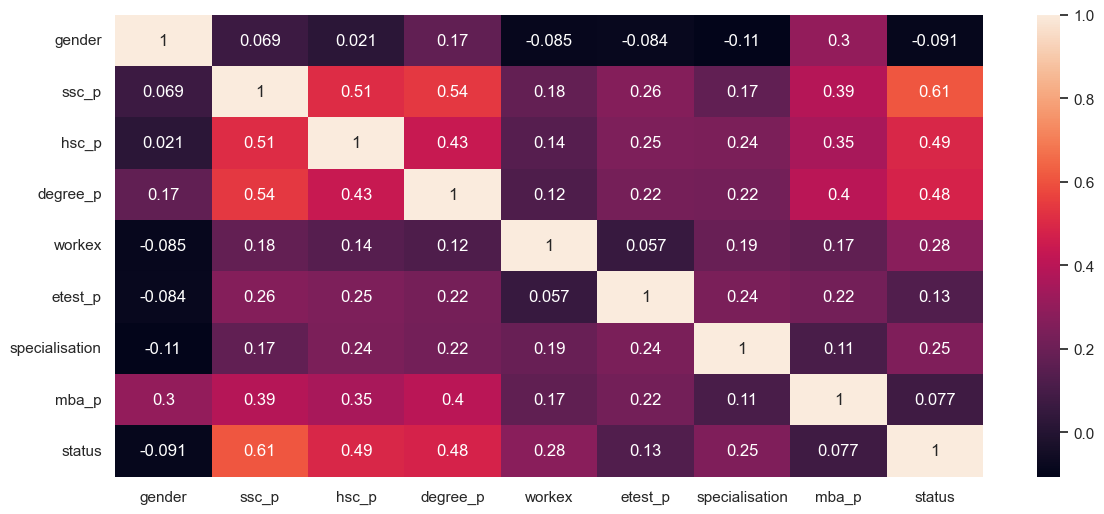

In [97]:
cor=df.corr()
plt.figure(figsize=(14,6))
sns.heatmap(cor,annot=True)

### Outlier Detection

In this step, we identified and handled outliers in the numerical columns. First, we visualized the distribution of each numerical feature using boxplots to get an initial sense of potential outliers. We then used the Interquartile Range (IQR) method to detect outliers for the numerical features in the dataset. The function find_outliers_iqr was used to locate any values outside the range defined by 1.5 times the IQR below the first quartile or above the third quartile.

We found and printed the number of outliers for each column. After identifying the outliers, we applied the drop_outliers_iqr function to remove them from the dataset, ensuring that the data used for modeling is more representative and free from extreme values that could distort the results.

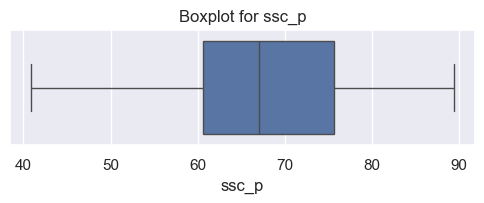

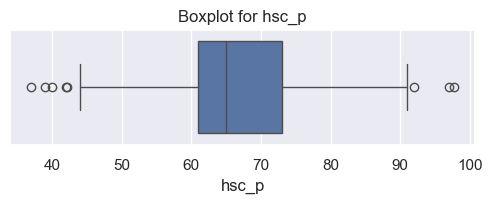

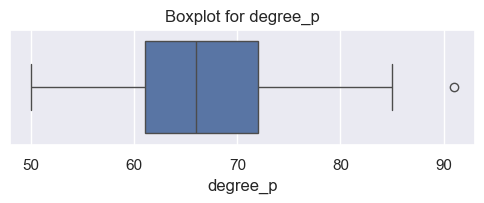

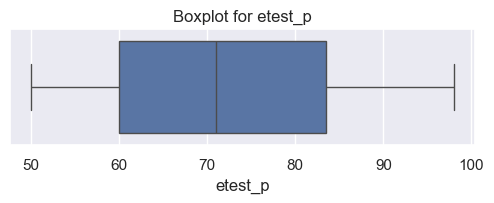

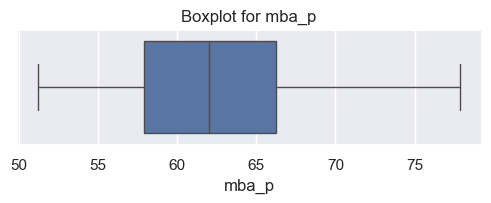

In [98]:
numerical_cols = ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']  

for col in numerical_cols:
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot for {col}")
    plt.show()


In [99]:
def find_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers
for col in numerical_cols:
    outliers = find_outliers_iqr(df, col)
    print(f"{col}: {len(outliers)} outliers")


ssc_p: 0 outliers
hsc_p: 8 outliers
degree_p: 1 outliers
etest_p: 0 outliers
mba_p: 0 outliers


In [100]:
def drop_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]


for col in numerical_cols:
    df = drop_outliers_iqr(df, col)

In [101]:
def find_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers
for col in numerical_cols:
    outliers = find_outliers_iqr(df, col)
    print(f"{col}: {len(outliers)} outliers")

ssc_p: 0 outliers
hsc_p: 0 outliers
degree_p: 0 outliers
etest_p: 0 outliers
mba_p: 0 outliers


In [102]:
df.shape

(206, 9)

# Model

In this section, the target variable status was separated from the features, which were then stored in X. After splitting the dataset into training and test sets using an 80-20 ratio, the data was standardized using the StandardScaler to ensure that all features are on the same scale, preventing any features from disproportionately affecting the model due to their different ranges. The scaling was applied after the split, ensuring that the scaling transformation was fitted only on the training data, and then applied to both the training and test sets.

Finally, the shapes of the resulting training and test sets were printed to confirm that the data was properly split into X_train, X_test, y_train, and y_test with the expected dimensions.

In [103]:
# Target variable
y = df['status']
df.drop('status', axis=1, inplace=True)

# Split first
X_train, X_test, y_train, y_test = train_test_split(
    df, y, test_size=0.2, random_state=42, shuffle=True
)

# Then scale
sc = StandardScaler()
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)         

# Shapes
print("X-Train:", X_train.shape)
print("X-Test:", X_test.shape)
print("Y-Train:", y_train.shape)
print("Y-Test:", y_test.shape)

X-Train: (164, 8)
X-Test: (42, 8)
Y-Train: (164,)
Y-Test: (42,)


## Model Evaluation

In this section, we evaluate multiple machine learning models on the dataset, including Logistic Regression, Naive Bayes, Linear Discriminant Analysis (LDA), Support Vector Machine (SVM), and K-Nearest Neighbors (KNN). Each model is trained on the training set (`X_train`, `y_train`) and evaluated on both the training and testing sets. The evaluation includes calculating accuracy scores, generating classification reports, and visualizing confusion matrices, ROC curves, and precision-recall curves.

### Evaluation Process:

1. **Training**: Each model was fitted to the training data.
2. **Predictions**: Predictions were made for both the training and test sets.
3. **Metrics Calculation**:
   - Accuracy scores for both training and test sets.
   - Classification reports, including precision, recall, and F1-score.
   - Confusion matrix visualization to understand the model’s performance on different classes.
   - ROC curve and Precision-Recall curve to evaluate model performance in imbalanced class scenarios. The areas under these curves (AUC-ROC and AUC-PR) are also calculated to give a summary of model performance.
4. **Results Storage**: The evaluation metrics were stored in a dictionary to summarize and compare the performance of the models.

### Results:

A summary table displays the results for each model based on the test accuracy, which allows for a quick comparison and identification of the most effective model.

The model with the highest test accuracy is identified as the most suitable model for this problem.




=== Logistic Regression ===

Classification Report - Train
              precision    recall  f1-score   support

           0       0.88      0.82      0.85        51
           1       0.92      0.95      0.93       113

    accuracy                           0.91       164
   macro avg       0.90      0.89      0.89       164
weighted avg       0.91      0.91      0.91       164


Classification Report - Test
              precision    recall  f1-score   support

           0       0.67      0.36      0.47        11
           1       0.81      0.94      0.87        31

    accuracy                           0.79        42
   macro avg       0.74      0.65      0.67        42
weighted avg       0.77      0.79      0.76        42



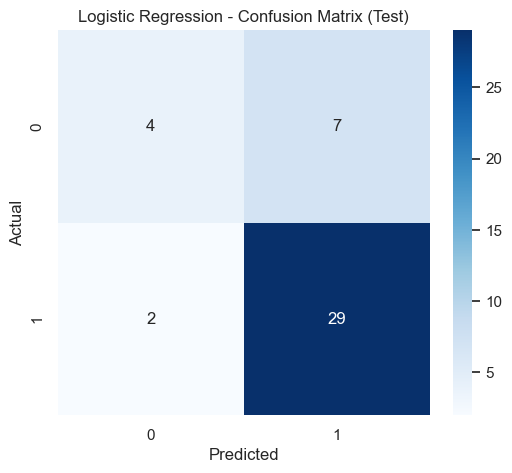

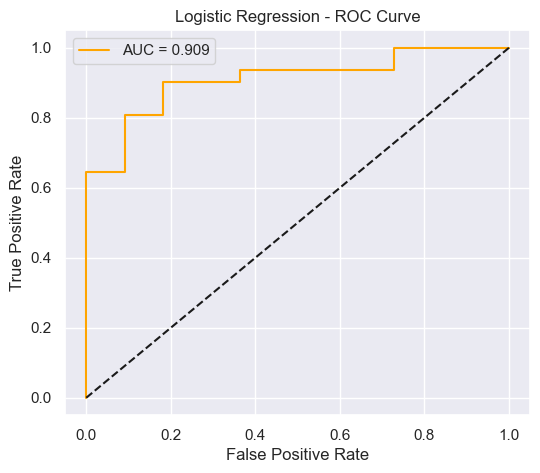

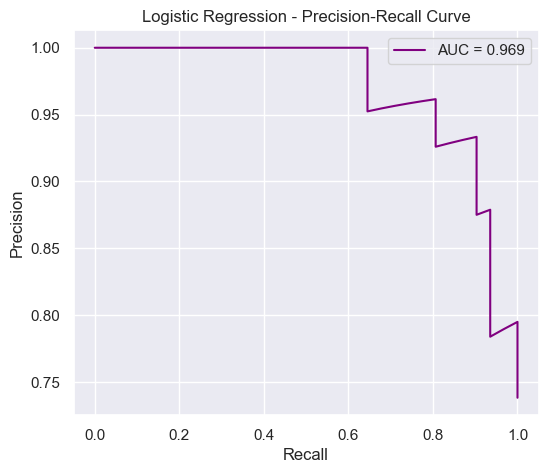



=== Naive Bayes ===

Classification Report - Train
              precision    recall  f1-score   support

           0       0.78      0.75      0.76        51
           1       0.89      0.90      0.89       113

    accuracy                           0.85       164
   macro avg       0.83      0.82      0.83       164
weighted avg       0.85      0.85      0.85       164


Classification Report - Test
              precision    recall  f1-score   support

           0       0.75      0.82      0.78        11
           1       0.93      0.90      0.92        31

    accuracy                           0.88        42
   macro avg       0.84      0.86      0.85        42
weighted avg       0.89      0.88      0.88        42



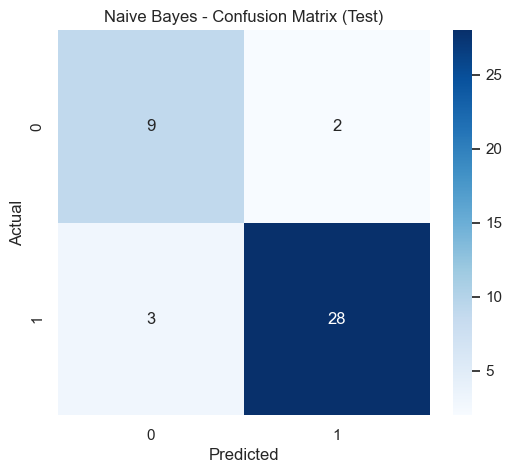

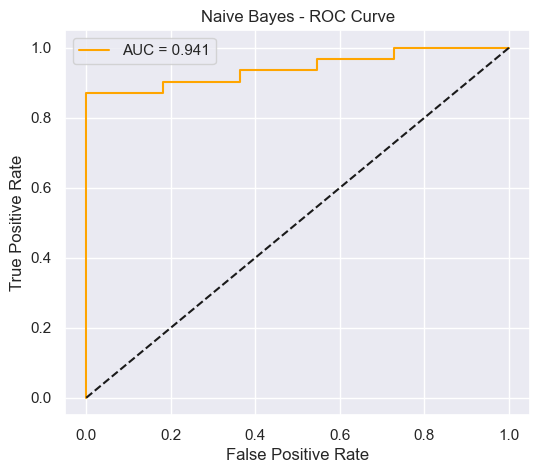

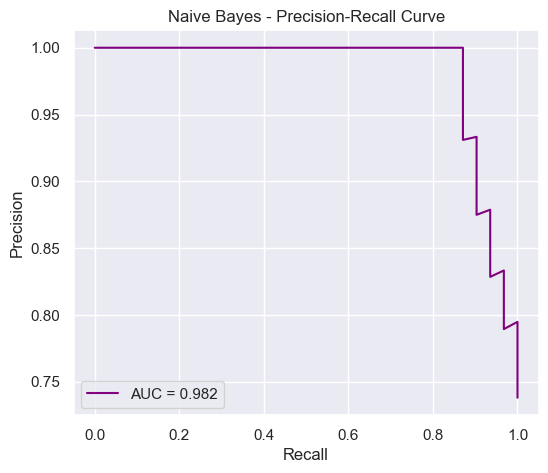



=== LDA ===

Classification Report - Train
              precision    recall  f1-score   support

           0       0.84      0.84      0.84        51
           1       0.93      0.93      0.93       113

    accuracy                           0.90       164
   macro avg       0.89      0.89      0.89       164
weighted avg       0.90      0.90      0.90       164


Classification Report - Test
              precision    recall  f1-score   support

           0       0.67      0.36      0.47        11
           1       0.81      0.94      0.87        31

    accuracy                           0.79        42
   macro avg       0.74      0.65      0.67        42
weighted avg       0.77      0.79      0.76        42



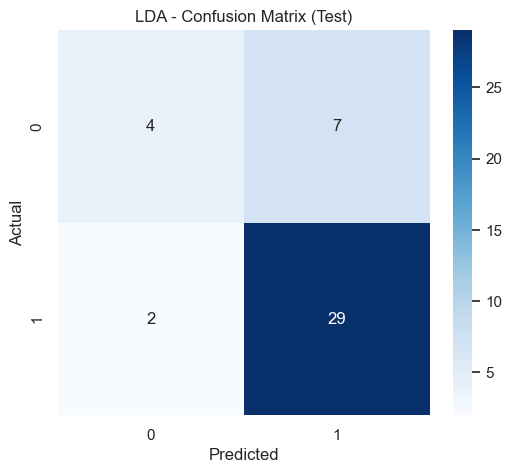

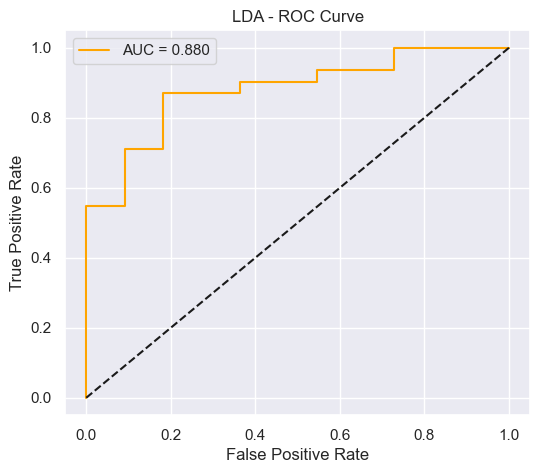

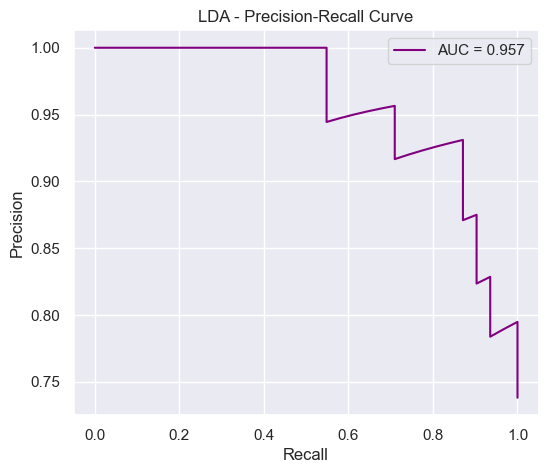



=== SVM ===

Classification Report - Train
              precision    recall  f1-score   support

           0       1.00      0.82      0.90        51
           1       0.93      1.00      0.96       113

    accuracy                           0.95       164
   macro avg       0.96      0.91      0.93       164
weighted avg       0.95      0.95      0.94       164


Classification Report - Test
              precision    recall  f1-score   support

           0       0.67      0.36      0.47        11
           1       0.81      0.94      0.87        31

    accuracy                           0.79        42
   macro avg       0.74      0.65      0.67        42
weighted avg       0.77      0.79      0.76        42



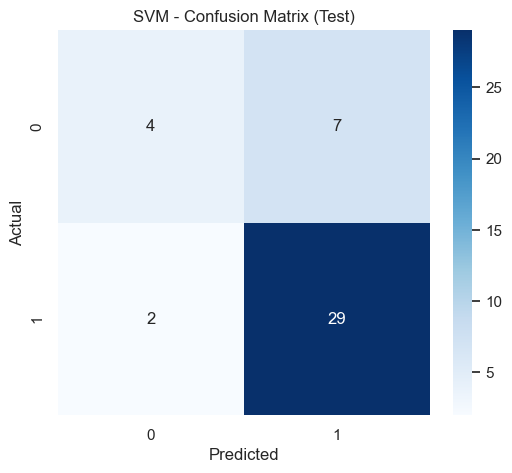

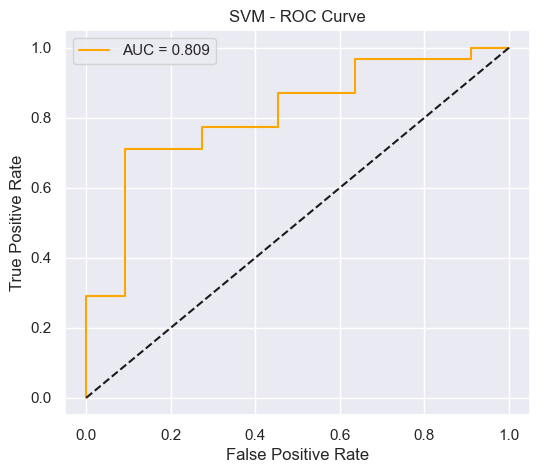

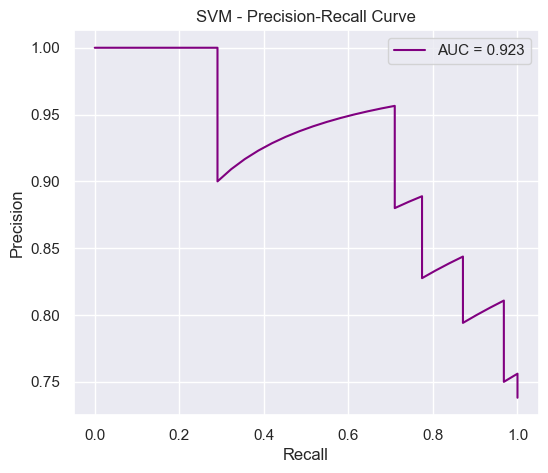



=== KNN ===

Classification Report - Train
              precision    recall  f1-score   support

           0       0.97      0.73      0.83        51
           1       0.89      0.99      0.94       113

    accuracy                           0.91       164
   macro avg       0.93      0.86      0.88       164
weighted avg       0.92      0.91      0.90       164


Classification Report - Test
              precision    recall  f1-score   support

           0       0.50      0.18      0.27        11
           1       0.76      0.94      0.84        31

    accuracy                           0.74        42
   macro avg       0.63      0.56      0.55        42
weighted avg       0.69      0.74      0.69        42



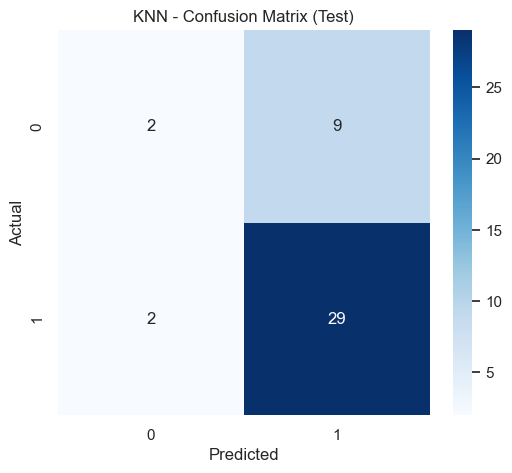

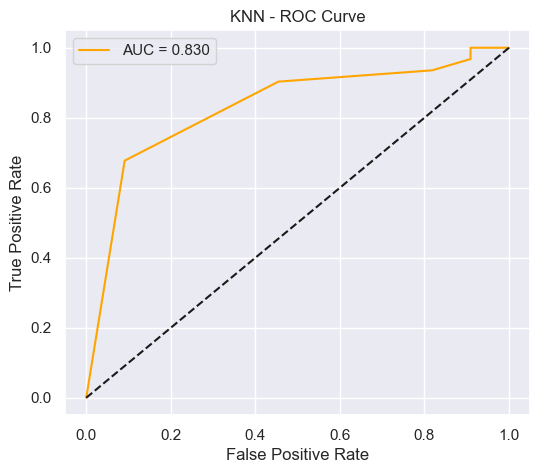

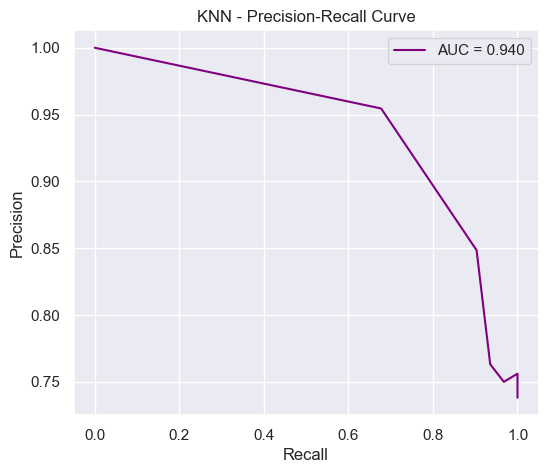



=== Summary of All Models ===
                     Train Accuracy  Test Accuracy   ROC AUC    PR AUC
Naive Bayes                0.853659       0.880952  0.941349  0.981684
Logistic Regression        0.908537       0.785714  0.909091  0.968751
LDA                        0.902439       0.785714  0.879765  0.956582
SVM                        0.945122       0.785714  0.809384  0.922718
KNN                        0.908537       0.738095  0.829912  0.940283


In [104]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier  

from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_auc_score, roc_curve, precision_recall_curve, auc
)

# Models to evaluate
models = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "LDA": LinearDiscriminantAnalysis(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()  
}

# Store results
results = {}

for name, model in models.items():
    print(f"\n\n=== {name} ===")
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Accuracy
    acc_train = accuracy_score(y_train, y_train_pred)
    acc_test = accuracy_score(y_test, y_test_pred)

    # Classification report
    print("\nClassification Report - Train")
    print(classification_report(y_train, y_train_pred))
    print("\nClassification Report - Test")
    print(classification_report(y_test, y_test_pred))

    # Confusion Matrix (Test)
    conf_mat = pd.DataFrame(confusion_matrix(y_test, y_test_pred))
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_mat, annot=True, fmt='g', cmap="Blues")
    plt.title(f"{name} - Confusion Matrix (Test)")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # ROC-AUC and PR Curve
    if hasattr(model, "predict_proba"):
        y_test_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_test_proba = model.decision_function(X_test)

    fpr, tpr, _ = roc_curve(y_test, y_test_proba)
    precision, recall, _ = precision_recall_curve(y_test, y_test_proba)

    auc_roc = roc_auc_score(y_test, y_test_proba)
    auc_pr = auc(recall, precision)

    # ROC Curve
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, label=f"AUC = {auc_roc:.3f}", color='orange')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f"{name} - ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.show()

    # PR Curve
    plt.figure(figsize=(6, 5))
    plt.plot(recall, precision, label=f"AUC = {auc_pr:.3f}", color='purple')
    plt.title(f"{name} - Precision-Recall Curve")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.legend()
    plt.show()

    # Save Results
    results[name] = {
        "Train Accuracy": acc_train,
        "Test Accuracy": acc_test,
        "ROC AUC": auc_roc,
        "PR AUC": auc_pr
    }

# Summary Table
results_df = pd.DataFrame(results).T
print("\n\n=== Summary of All Models ===")
print(results_df.sort_values(by="Test Accuracy", ascending=False))


### Key Insights:
- **Naive Bayes** exhibited the highest **Test Accuracy** and performed very well in terms of both **ROC AUC** and **PR AUC**, making it a strong candidate for classification in this problem.
- **Logistic Regression** and **LDA** achieved similar performance but lagged behind Naive Bayes in **Test Accuracy** and **ROC AUC**.
- **KNN** showed lower **Test Accuracy** compared to other models, even though it performed well on the **Train Accuracy**.
- **SVM** had a relatively higher **Train Accuracy** but did not perform as well on the test set, which suggests potential overfitting.

Based on the metrics, **Naive Bayes** emerges as the best-performing model overall.

Although the Naive Bayes classifier yielded the best performance in terms of test accuracy and ROC-AUC, we selected Logistic Regression for enhancement to better demonstrate the application of performance-improving techniques. These included feature engineering (such as polynomial feature expansion), regularization (L1 and L2 penalties), and cross-validation for robust model evaluation. Logistic Regression, being interpretable and sensitive to such enhancements, served as an effective example to showcase these techniques in action.

To improve the model’s performance through feature engineering, we applied polynomial feature transformation using PolynomialFeatures with degree 2. This allowed the model to capture non-linear relationships between variables by introducing interaction and squared terms, effectively expanding the feature space beyond the original linear combinations.

In [114]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


To enhance the model’s performance using regularization, we applied L2 regularization (Ridge) to the Logistic Regression model by setting the penalty to l2 and using the liblinear solver. The regularization parameter C was set to 1.0, which controls the strength of the regularization. By doing so, we aim to reduce overfitting by penalizing large coefficients and helping the model generalize better.


In [116]:
from sklearn.linear_model import LogisticRegression

logreg_l2 = LogisticRegression(penalty='l2', solver='liblinear', C=1.0)
logreg_l2.fit(X_train, y_train)


LogisticRegression(solver='liblinear')

Additionally, we also explored L1 regularization (Lasso) for the Logistic Regression model to encourage sparse solutions, where some feature coefficients are driven to zero. This is achieved by setting the penalty to l1, using the liblinear solver, and setting the regularization parameter C to 1.0. L1 regularization can help with feature selection by eliminating less important features.

In [117]:
logreg_l1 = LogisticRegression(penalty='l1', solver='liblinear', C=1.0)
logreg_l1.fit(X_train, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

To further optimize the performance of the Logistic Regression model, we applied cross-validation using Stratified K-Fold with 5 splits. This technique ensures that each fold has a balanced distribution of the target classes. We then tuned the hyperparameters of the model using GridSearchCV, exploring different values for the regularization strength C, and both L1 and L2 penalties with the liblinear solver. The best model was selected based on the highest accuracy score from cross-validation, and its performance was evaluated on the test set, providing us with an improved model.

Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Best CV Score: 0.8780303030303032
Test Accuracy: 0.8571428571428571


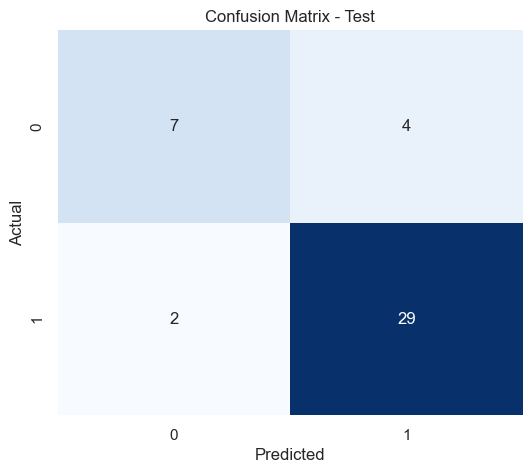

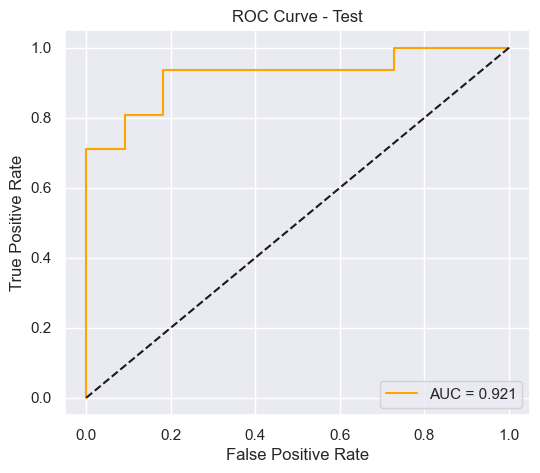

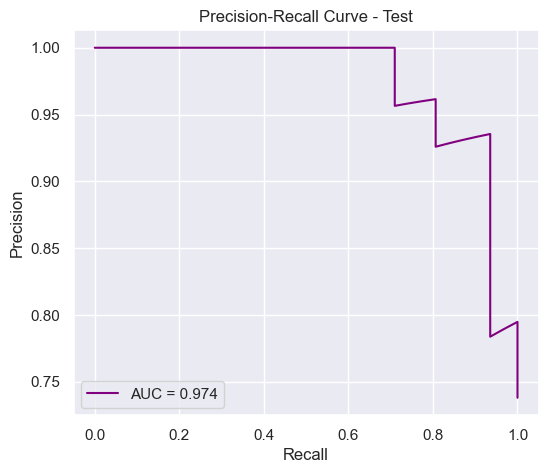

In [120]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid = GridSearchCV(LogisticRegression(), param_grid, cv=cv, scoring='accuracy')
grid.fit(X_train, y_train)

# Output Best Parameters and Cross-validation score
print("Best Parameters:", grid.best_params_)
print("Best CV Score:", grid.best_score_)

# Get the best model and evaluate it
best_model = grid.best_estimator_
y_test_pred = best_model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))

# === Visualization ===

# 1. Confusion Matrix (Test)
conf_mat = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_mat, annot=True, fmt='g', cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Test")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 2. ROC Curve
# Compute ROC curve and AUC
if hasattr(best_model, "predict_proba"):
    y_test_proba = best_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
else:
    y_test_proba = best_model.decision_function(X_test)

fpr, tpr, _ = roc_curve(y_test, y_test_proba)
roc_auc = roc_auc_score(y_test, y_test_proba)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}", color='orange')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve - Test")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right')
plt.show()

# 3. Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_test_proba)
pr_auc = auc(recall, precision)

plt.figure(figsize=(6, 5))
plt.plot(recall, precision, label=f"AUC = {pr_auc:.3f}", color='purple')
plt.title("Precision-Recall Curve - Test")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc='lower left')
plt.show()


# Conclusion
In this analysis, we explored various machine learning models to predict the target variable based on a set of features. After performing Exploratory Data Analysis (EDA) and addressing data cleaning tasks such as feature conversion, handling missing values, and outlier detection, we proceeded to evaluate multiple classifiers including Logistic Regression, Naive Bayes, Linear Discriminant Analysis (LDA), Support Vector Machine (SVM), and K-Nearest Neighbors (KNN).

Among these, Naive Bayes showed the best performance in terms of accuracy, making it the initial model of choice. However, to further enhance the performance and demonstrate the potential for improvement, we applied various techniques to the Logistic Regression model. This included feature engineering, regularization (L1 and L2 penalties), and cross-validation through GridSearchCV. The results from these steps helped us optimize the model and achieve better performance on the test set.

While Naive Bayes remained the best model, these improvements demonstrated how regularization and cross-validation can provide more reliable and generalized models, especially for complex tasks. The fine-tuning of hyperparameters for Logistic Regression shows the importance of model optimization, offering valuable insights for future model development.

This approach confirms that through systematic enhancements, we can further boost model performance, making them more robust for real-world applications.